#1. RingBufer 클래스

In [2]:
# Review : Circular Queue
#=========================================================
# 코드 2.1: 배열을 이용한 원형큐 클래스
#=========================================================

# 코드 2.1a: 원형 큐: 클래스 정의와 생성자
class ArrayQueue :
    def __init__( self, capacity = 10 ) :   # 생성자 정의
        self.capacity = capacity            # 용량(고정)
        self.array = [None] * capacity      # 요소들을 저장할 배열
        self.front = 0                     # 전단 인덱스
        self.rear = 0                      # 후단 인덱스

    # 코드 2.1b: 원형 큐: 공백상태와 포화상태 검사
    def isEmpty( self ) :                   # 공백 상태
        return self.front == self.rear

    def isFull( self ) :                    # 포화 상태
        return self.front == (self.rear+1) % self.capacity

    # 코드 2.1c: 원형 큐: 삽입 연산
    def enqueue( self, item ):              # 삽입 연산
        if not self.isFull():               # 포화 상태가 아닌 경우
            self.rear = (self.rear + 1) % self.capacity
            self.array[self.rear] = item
        else : pass                         # 오버플로 오류: 처리 않음

    # 코드 2.1d: 원형 큐: 삭제 연산
    def dequeue( self ):
        if not self.isEmpty():
            self.front = (self.front + 1) % self.capacity
            return self.array[self.front]
        else : pass                         # 언더플로 오류: 처리 않음

    # 코드 2.1e: 원형 큐: 상단 들여다보기 연산
    def peek( self ):
        if not self.isEmpty():
            return self.array[(self.front + 1) % self.capacity]
        else : pass                         # 언더플로 오류: 처리 않음

    # 코드 2.1f: 원형 큐: 전체 요소의 수
    def size( self ) :
        return (self.rear - self.front + self.capacity) % self.capacity

    # 코드 2.1g: 원형 큐: 전체 요소를 화면으로 출력
    def display(self, msg='Queue:' ):
        print(msg, end='= [')

        for i in range(self.front+1, self.front+1+self.size()):
            print(self.array[i % self.capacity], end=' ')
        print("]")


#=========================================================
# 코드 2.2: 원형 큐: 테스트 프로그램

import random
if __name__ == "__main__":
    q = ArrayQueue(8)               # 큐 객체를 생성(capacity=8)

    q.display("초기 상태")
    while not q.isFull() :          # 큐에 빈 칸인 남았으면
        q.enqueue(random.randint(0,100)) # 0~99사이의 정수 발생->삽입
    q.display("포화 상태")

    print("삭제 순서: ", end='')
    while not q.isEmpty() :         # 큐에 요소가 남아 있으면
        print(q.dequeue(), end=' ') # 꺼내서 화면에 출력
    print()




초기 상태= []
포화 상태= [81 98 71 65 2 19 31 ]
삭제 순서: 81 98 71 65 2 19 31 


In [4]:
# Class을 이용한 배열 기반 원형큐 클래스 설계(수정)
# Review : Circular Queue
#=========================================================
# 코드 2.1: 배열을 이용한 원형큐 클래스
#=========================================================

# 코드 2.1a: 원형 큐: 클래스 정의와 생성자
class ArrayQueue :
    def __init__( self, capacity = 10 ) :   # 생성자 정의
        self.capacity = capacity            # 용량(고정)
        self.array = [None] * capacity      # 요소들을 저장할 배열
        self.front = 0                     # 전단 인덱스
        self.rear = 0                      # 후단 인덱스

    # 코드 2.1b: 원형 큐: 공백상태와 포화상태 검사
    def isEmpty( self ) :                   # 공백 상태
        return self.front == self.rear

    def isFull( self ) :                    # 포화 상태
        return self.front == (self.rear+1) % self.capacity

    # 코드 2.1c: 원형 큐: 삽입 연산
    def enqueue( self, item ):              # 삽입 연산
        if not self.isFull():               # 포화 상태가 아닌 경우
            self.rear = (self.rear + 1) % self.capacity
            self.array[self.rear] = item
        else : pass                         # 오버플로 오류: 처리 않음

    # 코드 2.1d: 원형 큐: 삭제 연산 : 수정
    def dequeue( self ):
        if not self.isEmpty():
            self.front = (self.front + 1) % self.capacity
            item = self.array[self.front]
            self.array[self.front] = None 
            return item
        else : pass                         # 언더플로 오류: 처리 않음

    # 코드 2.1e: 원형 큐: 상단 들여다보기 연산
    def peek( self ):
        if not self.isEmpty():
            return self.array[(self.front + 1) % self.capacity]
        else : pass                         # 언더플로 오류: 처리 않음

    # 코드 2.1f: 원형 큐: 전체 요소의 수
    def size( self ) :
        return (self.rear - self.front + self.capacity) % self.capacity

    # 코드 2.1g: 원형 큐: 전체 요소를 화면으로 출력
    def display(self, msg='Queue:' ):
        print(msg, end='= [')

        for i in range(self.front+1, self.front+1+self.size()):
            print(self.array[i % self.capacity], end=' ')
        print("]")


#=========================================================
# 코드 2.2: 원형 큐: 테스트 프로그램

import random
if __name__ == "__main__":
    q = ArrayQueue(8)               # 큐 객체를 생성(capacity=8)

    q.display("초기 상태")
    print()

    num = 1
    while not q.isFull() :          # 큐에 빈 칸인 남았으면
        q.enqueue(num)
        print(f"queue : {q.array}")
        print(f"rear : {q.rear}")
        print(f"fornt : {q.front}")
        print()
        num += 1

    q.display("포화 상태")


    while not q.isEmpty() :
        print("삭제 데이터 : ", end='')
        print(q.dequeue(), end=' ') # 꺼내서 화면에 출력
        print(f"queue : {q.array}")
        print(f"rear : {q.rear}")
        print(f"fornt : {q.front}")
        print()

초기 상태= []

queue : [None, 1, None, None, None, None, None, None]
rear : 1
fornt : 0

queue : [None, 1, 2, None, None, None, None, None]
rear : 2
fornt : 0

queue : [None, 1, 2, 3, None, None, None, None]
rear : 3
fornt : 0

queue : [None, 1, 2, 3, 4, None, None, None]
rear : 4
fornt : 0

queue : [None, 1, 2, 3, 4, 5, None, None]
rear : 5
fornt : 0

queue : [None, 1, 2, 3, 4, 5, 6, None]
rear : 6
fornt : 0

queue : [None, 1, 2, 3, 4, 5, 6, 7]
rear : 7
fornt : 0

포화 상태= [1 2 3 4 5 6 7 ]
삭제 데이터 : 1 queue : [None, None, 2, 3, 4, 5, 6, 7]
rear : 7
fornt : 1

삭제 데이터 : 2 queue : [None, None, None, 3, 4, 5, 6, 7]
rear : 7
fornt : 2

삭제 데이터 : 3 queue : [None, None, None, None, 4, 5, 6, 7]
rear : 7
fornt : 3

삭제 데이터 : 4 queue : [None, None, None, None, None, 5, 6, 7]
rear : 7
fornt : 4

삭제 데이터 : 5 queue : [None, None, None, None, None, None, 6, 7]
rear : 7
fornt : 5

삭제 데이터 : 6 queue : [None, None, None, None, None, None, None, 7]
rear : 7
fornt : 6

삭제 데이터 : 7 queue : [None, None, None, None, N

In [9]:
# 코드 2.3: 원형 큐를 이용한 링버퍼 클래스 구현

class ArrayQueue:
    def __init__(self, capacity=10):  # 생성자 정의
        self.capacity = capacity            # 용량(고정)
        self.array = [None] * capacity      # 요소들을 저장할 배열
        self.front = 0                     # 전단 인덱스
        self.rear = 0                      # 후단 인덱스

    def isEmpty(self):  # 공백 상태
        return self.front == self.rear

    def isFull(self):  # 포화 상태
        return (self.rear + 1) % self.capacity == self.front

    def enqueue_2(self, item):  # 삽입 연산
        if self.isFull():  # 포화 상태인 경우
            print("Queue is full. Overwriting...")
            self.front = (self.front + 1) % self.capacity  # 덮어쓰기
            
        self.rear = (self.rear + 1) % self.capacity
        self.array[self.rear] = item

    def dequeue(self):  # 삭제 연산
        if not self.isEmpty():
            self.front = (self.front + 1) % self.capacity
            item = self.array[self.front]
            self.array[self.front] = None
            return item
        else:
            print("Queue is empty. Cannot dequeue.")
            return None

    def peek(self):  # 상단 들여다보기 연산
        if not self.isEmpty():
            return self.array[(self.front + 1) % self.capacity]
        else:
            print("Queue is empty.")
            return None

    def size(self):  # 전체 요소의 수
        return (self.rear - self.front + self.capacity) % self.capacity

    def display(self, msg='Queue:'):
        print(msg, end=' = [')
        for i in range(self.front + 1, self.front + 1 + self.size()):
            print(self.array[i % self.capacity], end=' ')
        print("]")

#=========================================================
# 테스트 프로그램
import random
if __name__ == "__main__":
    q = ArrayQueue(8)  # 큐 객체를 생성(capacity=8)

    q.display("초기 상태")
    print()
    
    for i in range(6):
        q.enqueue_2(i)
        print(f"queue : {q.array}")
        print(f"rear : {q.rear}")
        print(f"front : {q.front}")
        print()

    q.display("삽입 0-5")
    print()

    q.enqueue_2(6)
    print(f"queue : {q.array}")
    print(f"rear : {q.rear}")
    print(f"front : {q.front}")
    print()

    q.enqueue_2(7)
    print(f"queue : {q.array}")
    print(f"rear : {q.rear}")
    print(f"front : {q.front}")
    print()

    q.display("삽입 6, 7")
    print()

    q.enqueue_2(8)
    print(f"queue : {q.array}")
    print(f"rear : {q.rear}")
    print(f"front : {q.front}")
    print()

    q.enqueue_2(9)
    print(f"queue : {q.array}")
    print(f"rear : {q.rear}")
    print(f"front : {q.front}")
    print()

    q.display("삽입 8, 9")
    print()

    q.dequeue()
    print(f"queue : {q.array}")
    print(f"rear : {q.rear}")
    print(f"front : {q.front}")
    print()

    q.dequeue()
    print(f"queue : {q.array}")
    print(f"rear : {q.rear}")
    print(f"front : {q.front}")
    print()

    q.display("삭제 X2")

초기 상태 = []

queue : [None, 0, None, None, None, None, None, None]
rear : 1
front : 0

queue : [None, 0, 1, None, None, None, None, None]
rear : 2
front : 0

queue : [None, 0, 1, 2, None, None, None, None]
rear : 3
front : 0

queue : [None, 0, 1, 2, 3, None, None, None]
rear : 4
front : 0

queue : [None, 0, 1, 2, 3, 4, None, None]
rear : 5
front : 0

queue : [None, 0, 1, 2, 3, 4, 5, None]
rear : 6
front : 0

삽입 0-5 = [0 1 2 3 4 5 ]

queue : [None, 0, 1, 2, 3, 4, 5, 6]
rear : 7
front : 0

Queue is full. Overwriting...
queue : [7, 0, 1, 2, 3, 4, 5, 6]
rear : 0
front : 1

삽입 6, 7 = [1 2 3 4 5 6 7 ]

Queue is full. Overwriting...
queue : [7, 8, 1, 2, 3, 4, 5, 6]
rear : 1
front : 2

Queue is full. Overwriting...
queue : [7, 8, 9, 2, 3, 4, 5, 6]
rear : 2
front : 3

삽입 8, 9 = [3 4 5 6 7 8 9 ]

queue : [7, 8, 9, 2, None, 4, 5, 6]
rear : 2
front : 4

queue : [7, 8, 9, 2, None, None, 5, 6]
rear : 2
front : 5

삭제 X2 = [5 6 7 8 9 ]


In [10]:
# 코드 2.6: queue 모듈의 Queue 테스트 프로그램

import queue 			        # 파이썬의 큐 모듈 포함
import random                   # 난수 발생을 위해 random 모듈 포함

q = queue.Queue(8)              # 큐 객체를 생성(capacity=8)

print("삽입 순서: ", end='')
while not q.full() :            # 큐에 빈 칸인 남았으면
    v = random.randint(0,100)   # 0~99사이의 정수 발생
    q.put(v)                    # 삽입
    print(v, end=' ')
print()

print("삭제 순서: ", end='')
while not q.empty() :         # 큐에 요소가 남아 있으면
    print(q.get(), end=' ') # 꺼내서 화면에 출력
print()



삽입 순서: 39 28 42 11 96 55 68 41 
삭제 순서: 39 28 42 11 96 55 68 41 


2. 단순 연결 리스트 자료구조

In [ ]:
# 코드 3.1: 단순연결구조의 노드 클래스

class Node:
    def __init__(self, elem, next = None):
        self.data = elem
    self.link = next

    def append(self, node):
        if node is not None: # node 가 None이 아닌 경우 
            node.link = self.link 
            self.link = node

    def popNext(self):
        next = self.link # 현재 노드의 다음 노드
        if next is not None:
            self.link = next.link
            return next 

class LinkedList:
    def __init__(self):
    self.head =+ None  # 비어있는 초기 연결 리스트

    def isEmpty(self):
        return self.head == None

    def isFull(self):
        return False # 동적으로 메모리 사용

    def getNode(self, pos):
        if pos < 0: return Node
            ptr= self.head

    for i in range(pos):
        if ptr == None: # pos 리스트 크기보다 큰 경우
            return None
        ptr = ptr.link
    return ptr

    def getEmpty(self, pos):
        node = self.getNode(pos)

    if node == None: return None
    else:
        return node.data

    def insert(self, pos, elem):
        node = Node(elem, None)
        before = self.getNode(pos-1)
        if before == None:  # 연결 리스타가 빈 상태인 경우
           node.link = self.head  # node의 링크가 머리노드를 가리킴
           self.head = node  # 이제 node의 머리노드가 됨
            
            else: before.append(node)  # 중간 위치나 마지막 위치에 있을 경우 삽입 

    def delete(self, pos):
        before = self.getNode(pos-1)
        if befor == None:  # 머리 노드 삭제인 경우
            if self.head is not None:  # 공백 상태가 아니면
                self.head = self.head.link  # 머리 노드 업데트트
            else:
                before.popNext()  # before 노드의 다음 노드 삭제


In [ ]:
#=========================================================
# 코드 3.3: LinkedList와 파이썬 리스트 비교

# 단순연결리스트(LinkedList) 사용
s = LinkedList()
s.display('연결리스트( 초기 ): ')
s.insert(0, 10)
s.insert(0, 20)
s.insert(1, 30)
s.insert(s.size(), 40)
s.insert(2, 50)
s.display("연결리스트(삽입x5): ")
s.replace(2, 90)
s.display("연결리스트(교체x1): ")
s.delete(2)
s.delete(3)
s.delete(0)
s.display("연결리스트(삭제x3): ")


# 파이썬의 리스트 사용
l = []
print('파이썬list( 초기 ):', l)
l.insert(0, 10)
l.insert(0, 20)
l.insert(1, 30)
l.insert(len(l), 40)
l.insert(2, 50)
print('파이썬list(삽입x5):', l)
l[2] = 90
print('파이썬list(교체x1):', l)
l.pop(2)
l.pop(3)
l.pop(0)
print('파이썬list(삭제x3):', l)



연결리스트( 초기 ): None
연결리스트(삽입x5): 20->30->50->10->40->None
연결리스트(교체x1): 20->30->90->10->40->None
연결리스트(삭제x3): 30->10->None
파이썬list( 초기 ): []
파이썬list(삽입x5): [20, 30, 50, 10, 40]
파이썬list(교체x1): [20, 30, 90, 10, 40]
파이썬list(삭제x3): [30, 10]


# #. 프로그래밍 문제: 도서관리 시스템
  - 자료구조 : 단순 연결 리스트
    - 단순 연결리스트와 Node 클래스는 이전 코드와 동일하게 작성
  - class 기반으로 OOP 구현
  - 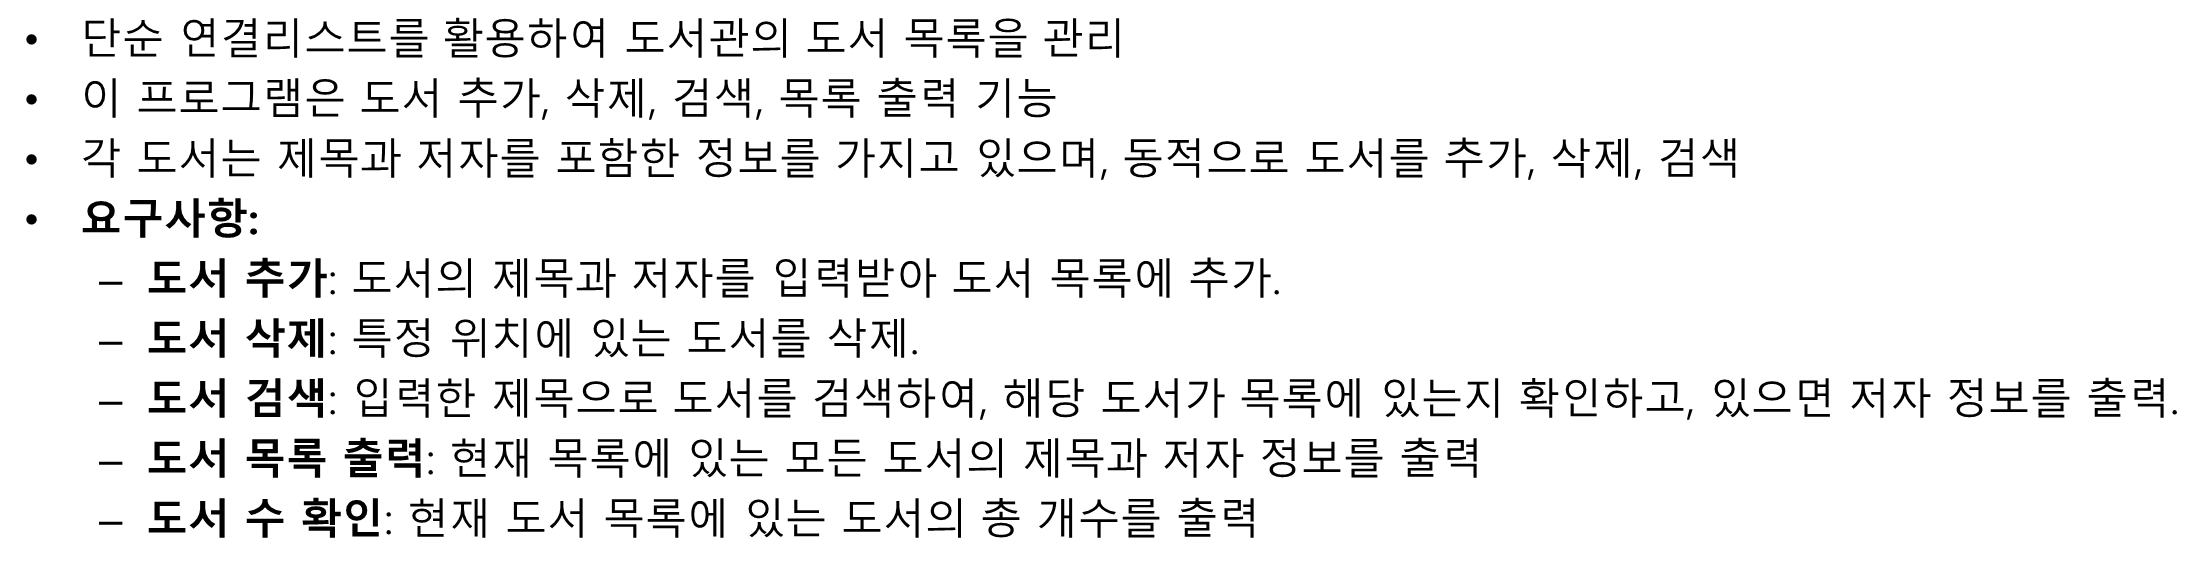